# Lab 02a: Visualize & Explore Data

load libraries

In [78]:
library(DiagrammeR)
library(dslabs)
library(tidyverse)
library(reshape)
library(pastecs)
library(naniar)
library(GGally)
library(ggpubr)

Load GapMinder dataset

In [ ]:
data("gapminder", package = "dslabs")
gapminder <- gapminder %>% as_tibble
# ?gapminder

examine first rows of the dataset

In [8]:
head(gapminder)
names(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


[1] "country"          "year"             "infant_mortality" "life_expectancy" 
[5] "fertility"        "population"       "gdp"              "continent"       
[9] "region"

show missing data in various ways

Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."


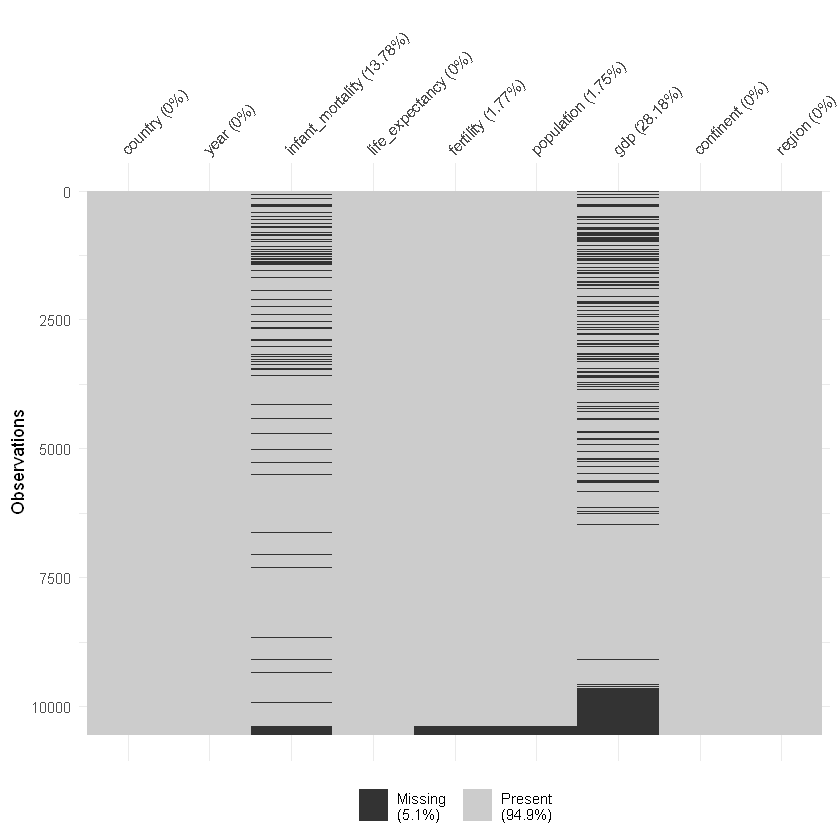

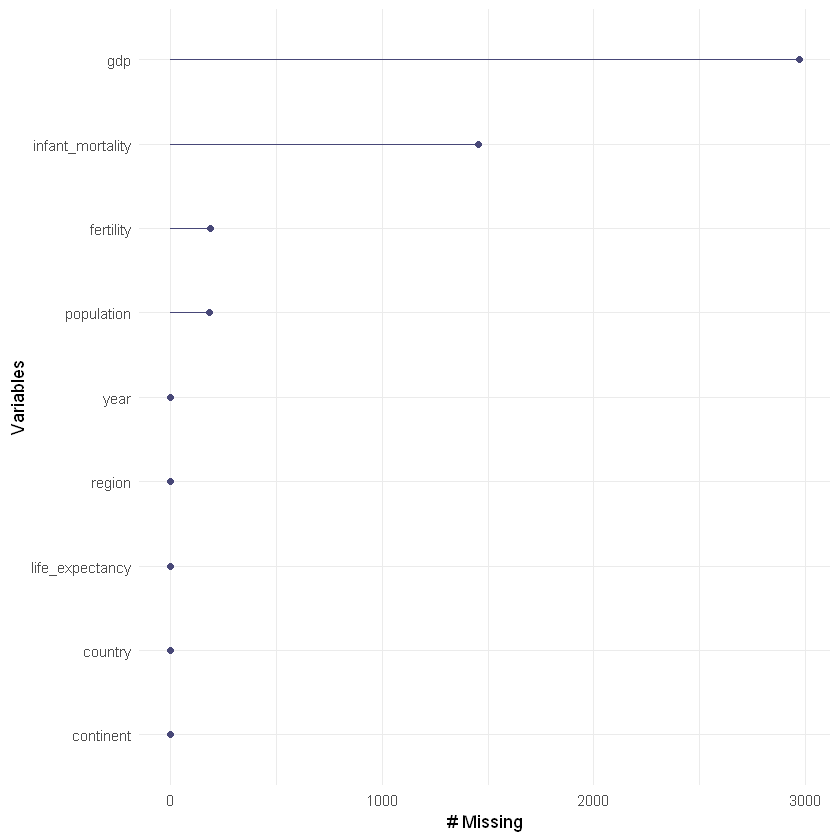

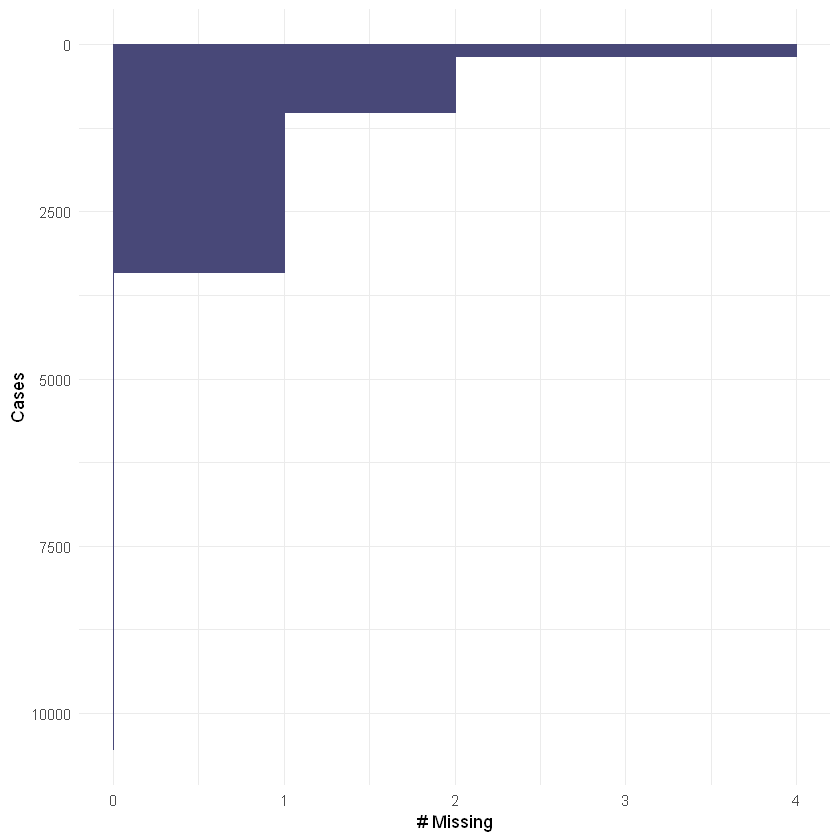

In [9]:
naniar::vis_miss(gapminder) #+ 
  # toolboxr::rotate_axis_labels(axis = "x", angle = 90)

ggsave(filename = "missing_gapminder.svg", height = 11, width = 10)

naniar::gg_miss_var(gapminder)

naniar::gg_miss_case(gapminder)

show missing data

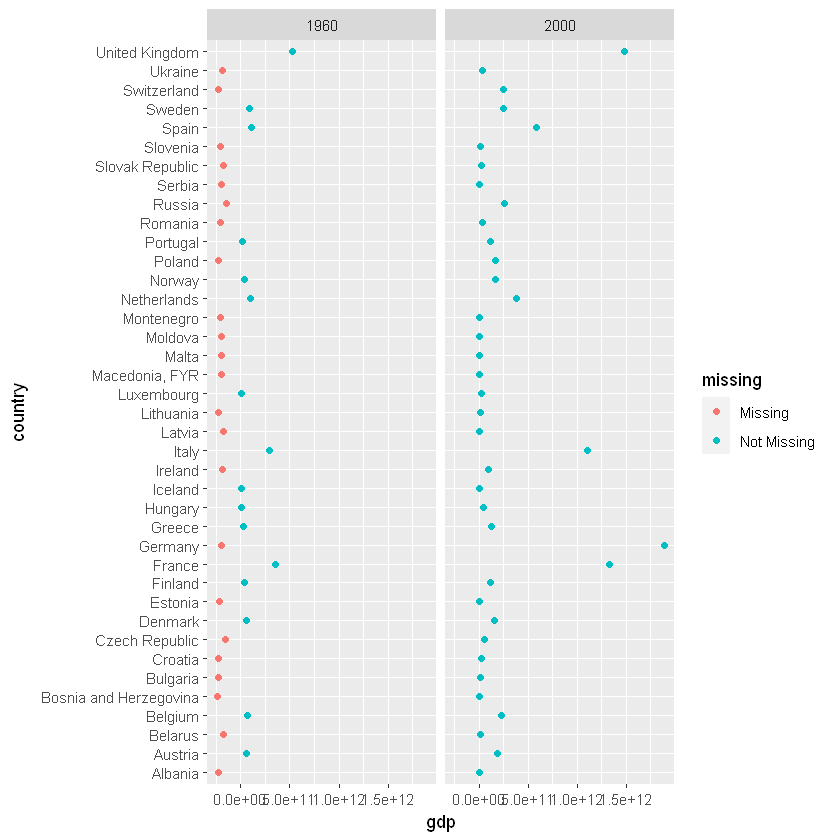

In [11]:
gapminder %>%
  dplyr::filter(year == 1960 | year == 2000) %>%
  dplyr::filter(continent == "Europe") %>%
  ggplot(aes(x = country,
         y = gdp)) +
  naniar::stat_miss_point() +
  coord_flip() +
  facet_wrap(~year)

look at all data

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1453 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 187 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 185 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2972 rows containing missing values"
Warning message:
"Removed 1453 rows containing missing values (geom_point)."
Warning message:
"Removed 1453 rows containing non-finite values (stat_density)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1453 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 1453 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping 

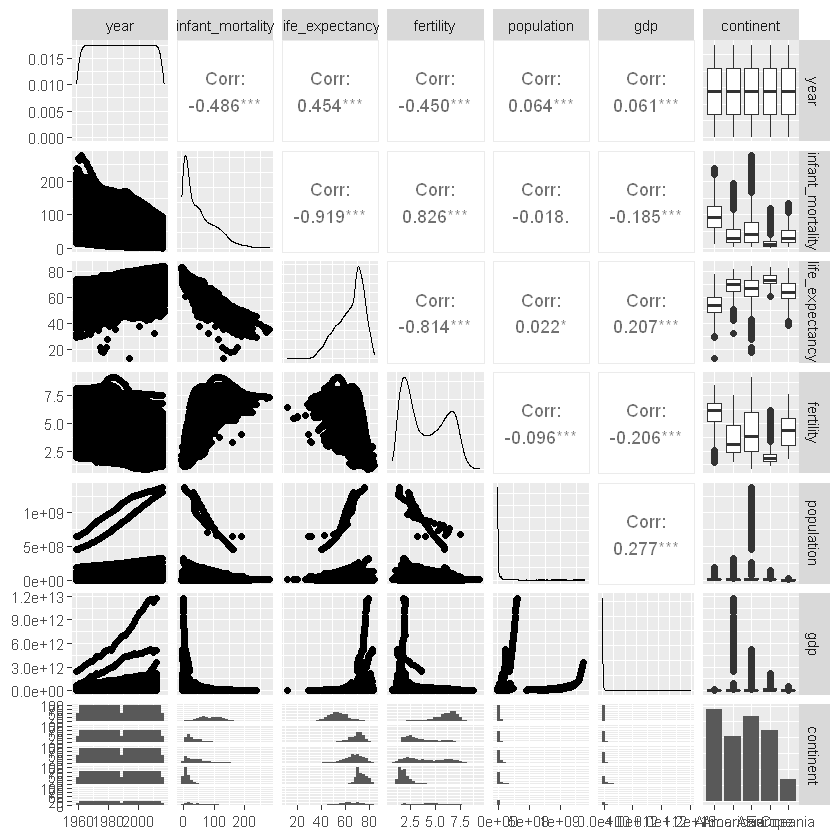

In [16]:
gapminder %>%
  dplyr::select(-c(country, region)) %>%
ggpairs()

create scatterplot (point plot)

Warning message:
"Removed 187 rows containing missing values (geom_point)."


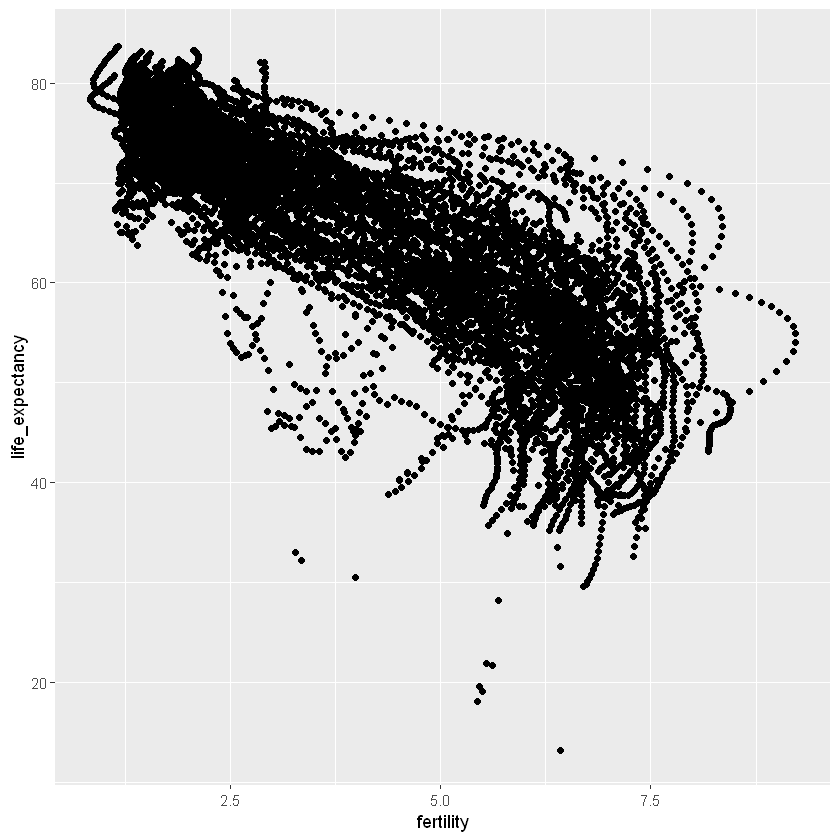

In [13]:
gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point()

Reduce transparancy

Warning message:
"Removed 187 rows containing missing values (geom_point)."


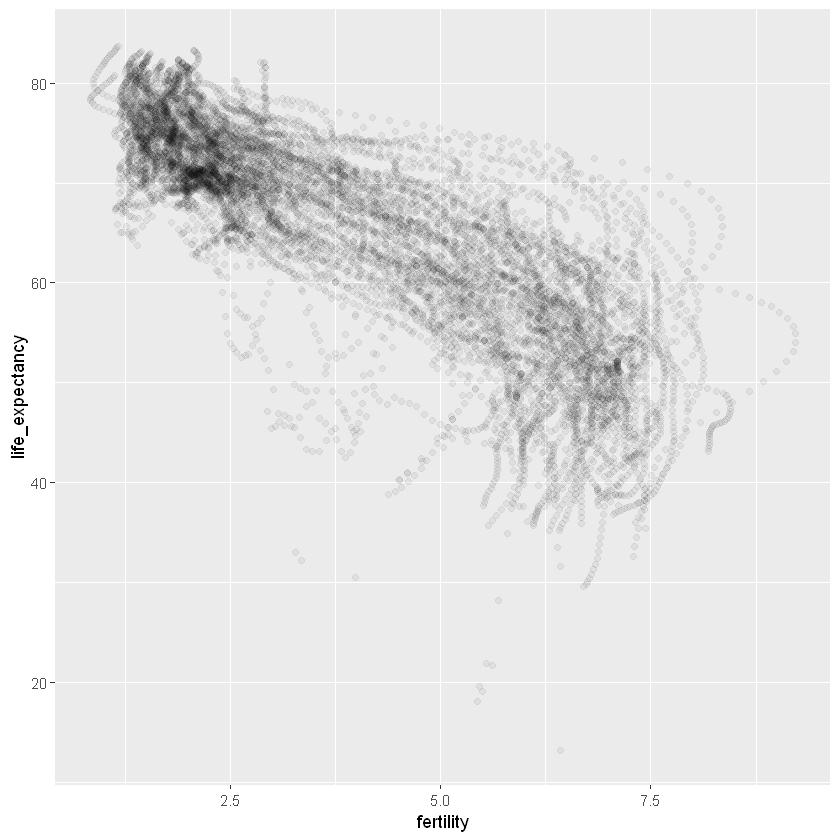

In [17]:
gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(alpha = 0.05)

map colors to variables and set alpha

Warning message:
"Removed 187 rows containing missing values (geom_point)."
Warning message:
"Removed 187 rows containing missing values (geom_point)."


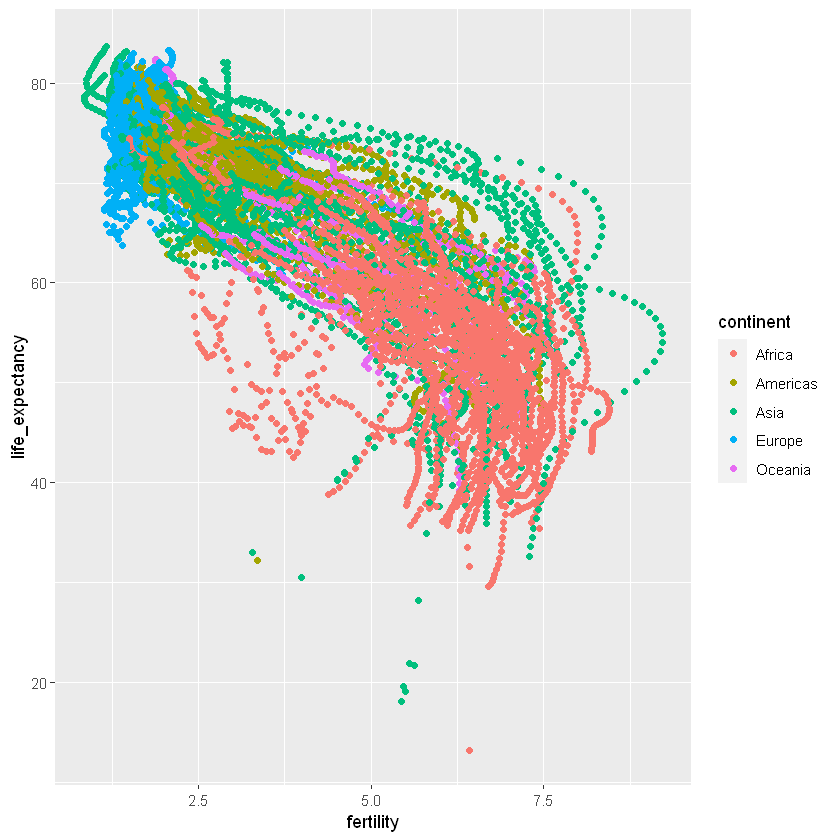

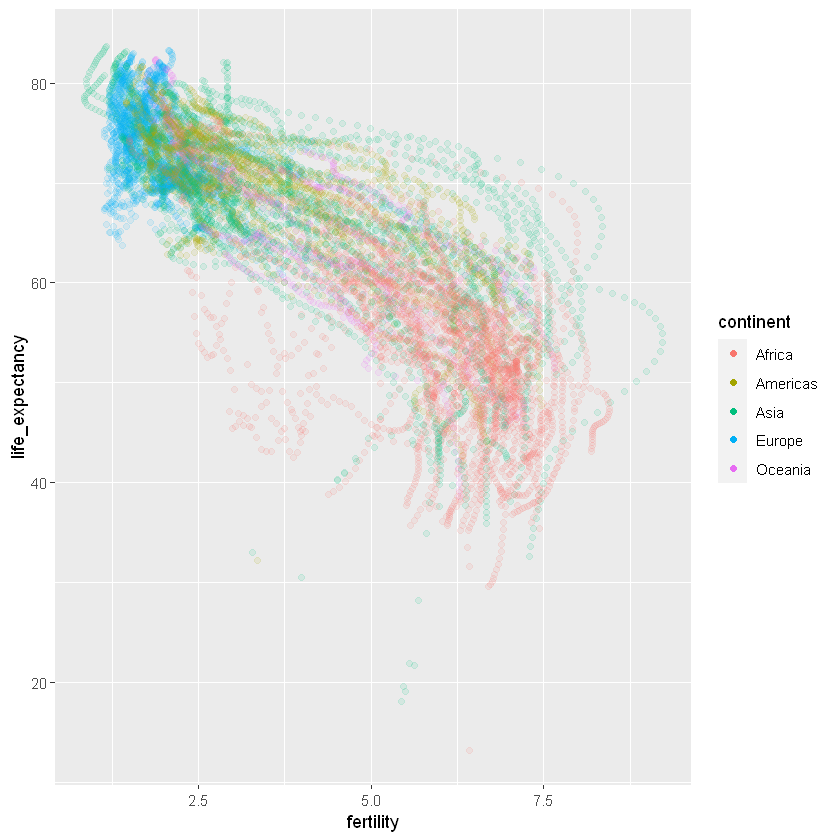

In [18]:
gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = continent))

## or combined with transparancy
gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = continent), alpha = 0.1) +
  guides(colour = guide_legend(override.aes = list(alpha = 1)))

subset data and make plots more readable using log10 transformation

Warning message:
"Removed 51 rows containing missing values (geom_point)."
Warning message:
"Removed 51 row(s) containing missing values (geom_path)."


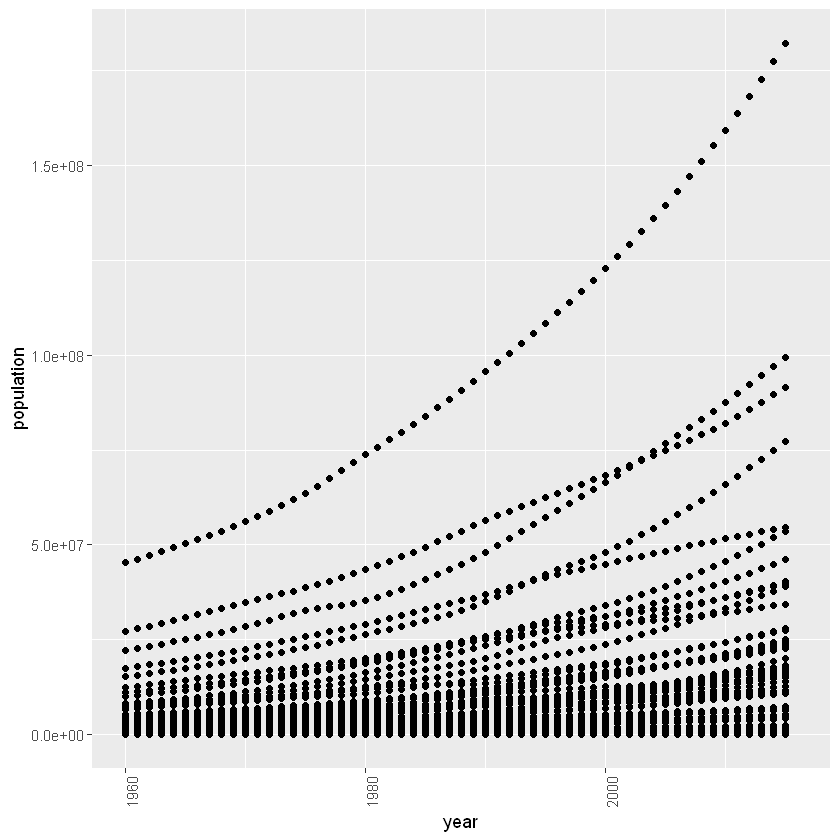

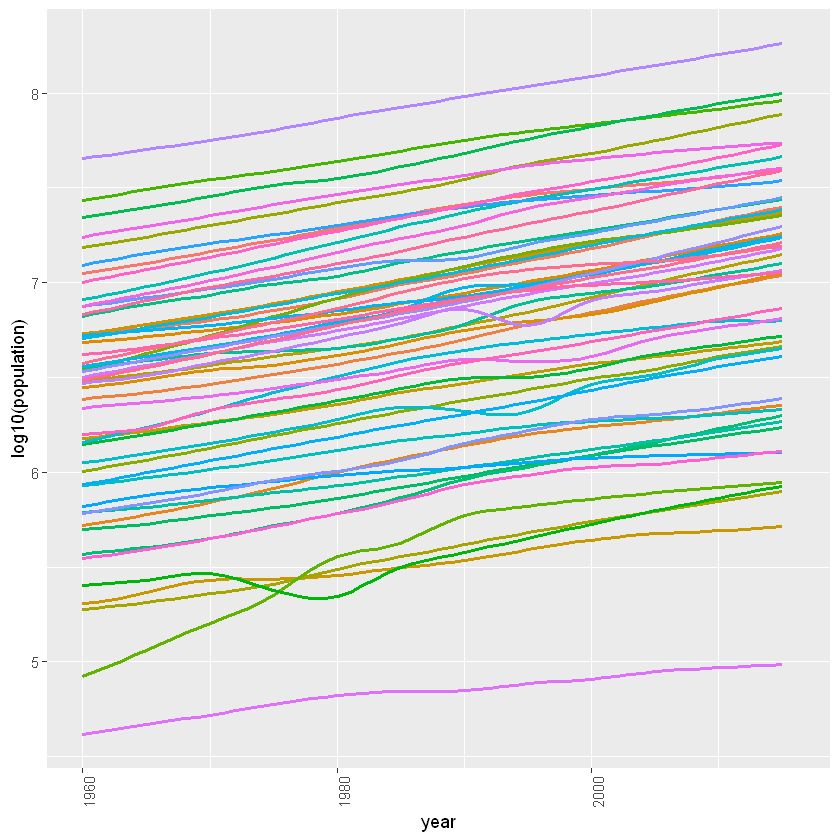

In [19]:
gapminder %>% 
  dplyr::filter(continent == "Africa") %>%
  ggplot(aes(x = year, y = population)) + 
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## using a colour for continent
gapminder %>% 
  dplyr::filter(continent == "Africa") %>%
  ggplot(aes(x = year, y = log10(population))) + ## why log10?
  geom_line(aes(group = country,
                colour = country),
            show.legend = FALSE, size = 1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# EXERCISE 1; Make a plan


On the basis of the above picture: Create an EDA plan to investigate whether the population growth rate is different between Africa and Asia in general. How would you approach this? Create a stepwise plan, describe the PPDAC cycle:<br>
![PPDAC cycle](https://cdn.sketchbubble.com/pub/media/catalog/product/optimized1/f/0/f0f3b17351e8f0d83f9f037724bc880fc3a5420d4e4ebde3d7f9c8600b7d3594/ppdac-cycle-mc-slide.png)

**Problem**:
    Is the population growth between asia and africa the same (absolute / relative). Answer with a graph
**Plan**:
    measure growth of all asian countries or the mean growth of asia
**Data**:
    1: subset asia
    2: average over all countries per year for asia
    3: average over all countries per year for africa
**Analysis**:
    1. show in line diagram asia
    2. show line diagram africa
**Conclusion**:
    1. write conclusion

How would you formally ‘prove’ that growth rates between Africa and Asia in general are the same or different? What statitical model do you think is appropriate. What are the underlying assumptions for your model(s)?

How would you, using the same strategy as under 1A) and 1B) subset the data for African countries that have deviating growth rate differences from the overall trend.

Can you create a plan to create a graph showing the general overall growth rate over the years for all continents in the gapminder dataset? What kind of data-wrangling operation is neccessary to create such a graph (what kind of summary of the data do you need and how would you group the data). Make a conceptual datatable that shows the endproduct. (we will come back to this exercise in Chapters ?? and ??.


`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.
Warning message:
"Removed 5 rows containing missing values (geom_point)."


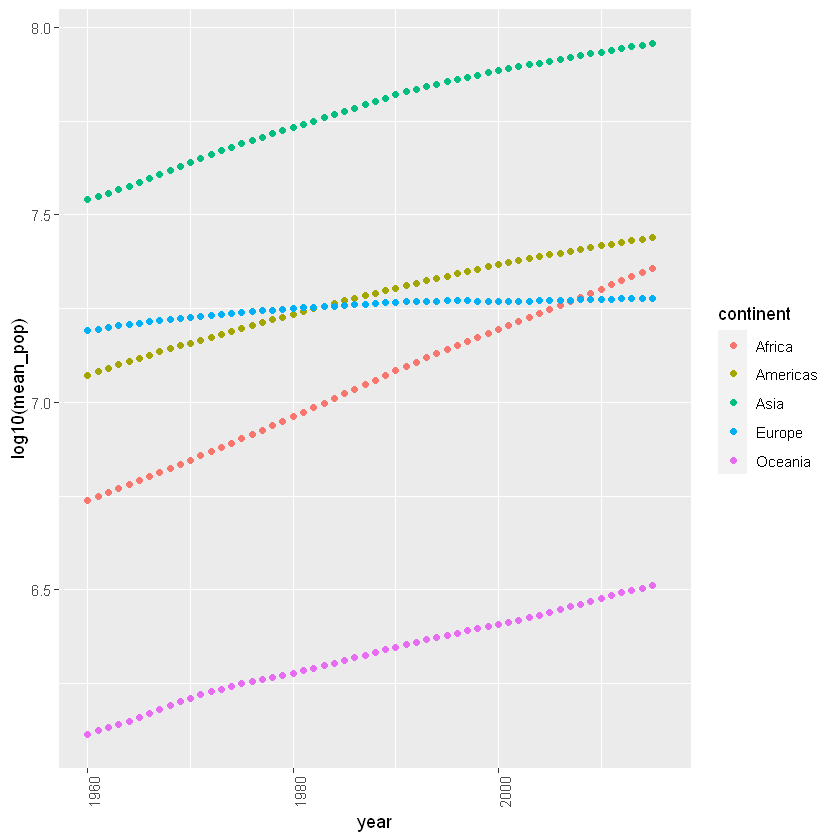

In [59]:

gapminder %>%
    # dplyr::filter(continent == "Africa" | continent == "Asia")  %>%
    group_by(continent,year) %>%
    summarise(mean_pop = mean(population, na.rm = TRUE)) %>%
        ggplot(aes(x = year, y = log10(mean_pop))) + 
        geom_point(aes(colour = continent)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))


# EXERCISE 2; Playing around with the aes() and other ggplot options

Try adjusting some of the arguments in the previous ggplot2 call.
 
    For example, adjust the 
    alpha = ... or change the variable in x = ..., y = ... or colour = ...
    names(gapminder) gives you the variable names that you can change

Show and discuss the resulting plot with your neighbour
What do you think this part does:

    guides(colour = guide_legend(override.aes = list(alpha = 1)))

Try to find out by disabling with #
Can you find the country that over time showed a very low life expectancy?
    Play around with the alpha = 1 setting.

    Filter for two continents to see the difference

What does the aes() part of the geom_point() do?
Compare the code below with the code above, can you spot the difference, what is the advantage of the code below? Run the code yourself to see it.


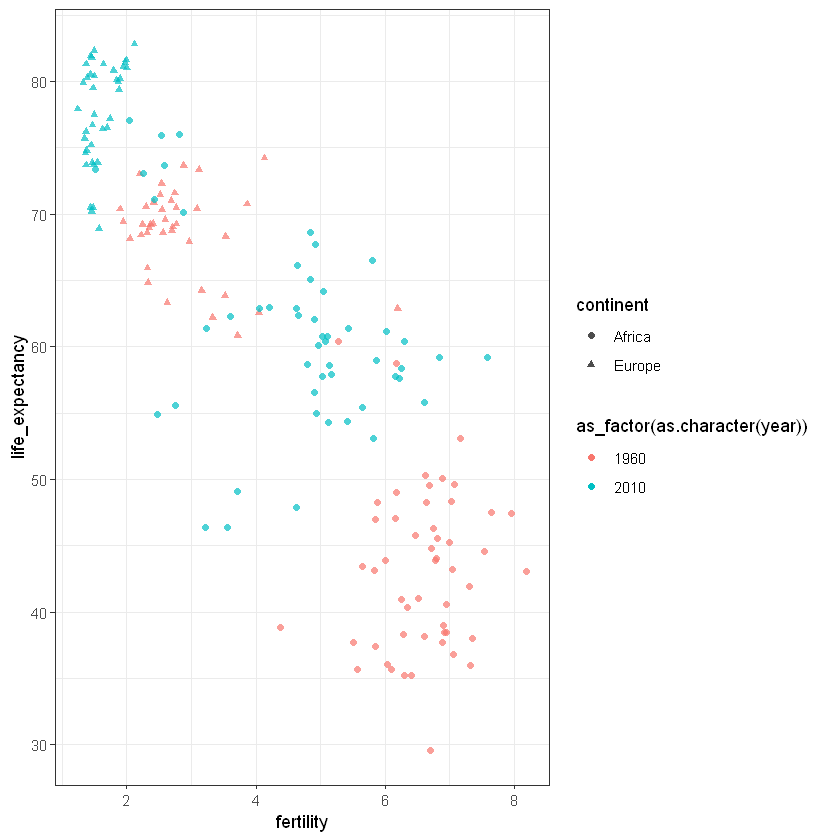

In [62]:
shape_plot <- gapminder %>% 
  dplyr::filter(continent == "Africa" | continent == "Europe",
         year == "1960" | year == "2010") %>%
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = as_factor(as.character(year)), 
                 shape = continent), 
             alpha = 0.7) +
  theme_bw() +
  guides(colour = guide_legend(override.aes = list(alpha = 1)))
shape_plot

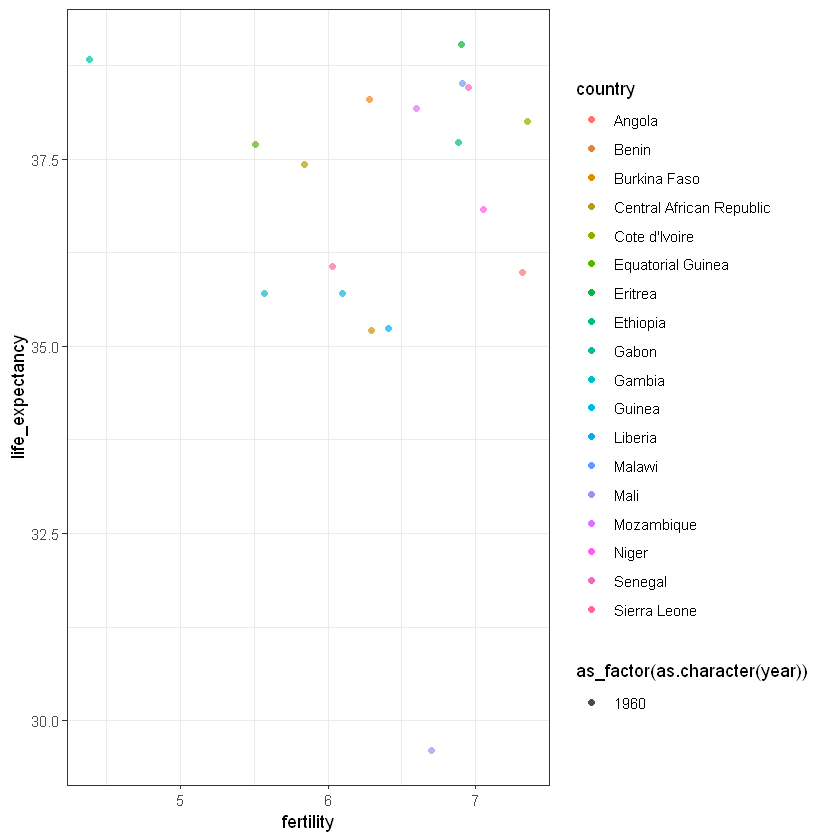

In [64]:
shape_plot <- gapminder %>% 
  dplyr::filter(continent == "Africa",
         year == "1960" | year == "2010",
         life_expectancy < 40) %>%
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = country, 
                 shape = as_factor(as.character(year))), 
             alpha = 0.7) +
  theme_bw() +
  guides(colour = guide_legend(override.aes = list(alpha = 1)))
shape_plot

# EXERCISE 3; Do it youself

    Try removing the as_factor(as.character(year)) call and replace this by only year above and rerun the plot, what happened?

--> error message

ERROR while rich displaying an object: Error in `scale_f()`:
! A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.def

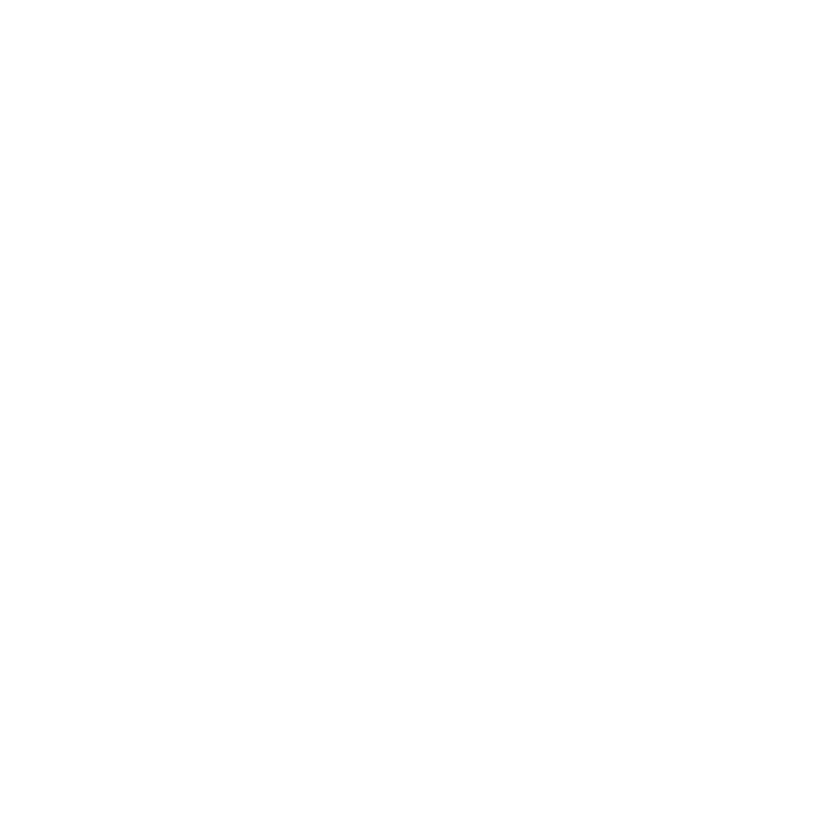

In [67]:
shape_plot <- gapminder %>% 
  dplyr::filter(continent == "Africa",
         year == "1960" | year == "2010",
         life_expectancy < 40) %>%
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = country, 
                 shape = year), 
             alpha = 0.7) +
  theme_bw() +
  guides(colour = guide_legend(override.aes = list(alpha = 1)))
shape_plot

Facetting

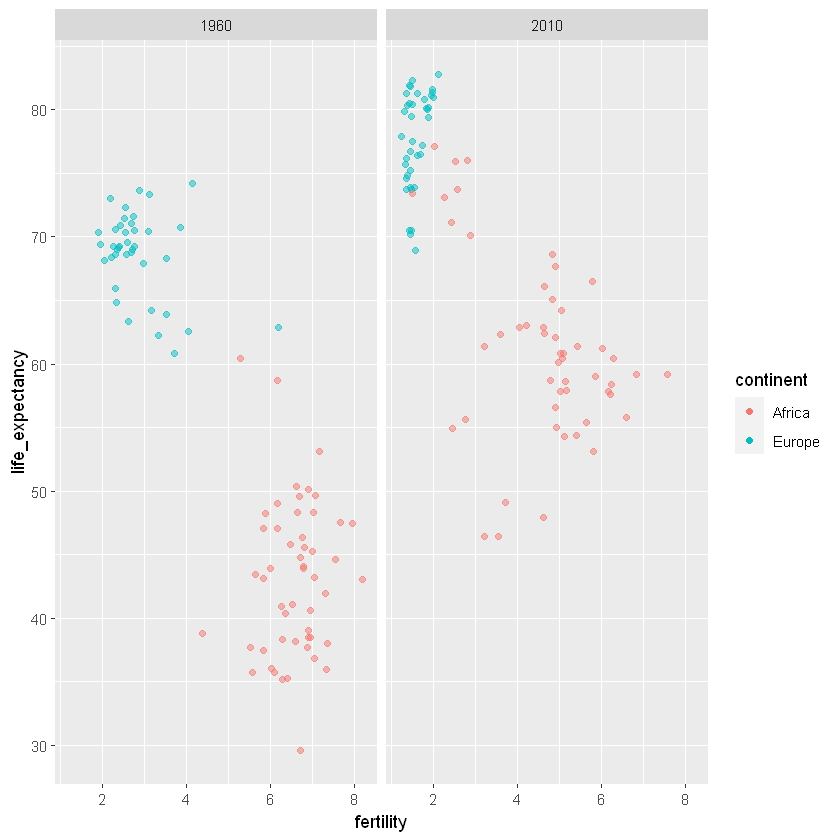

In [68]:
facets_plot <- gapminder %>% 
  dplyr::filter(continent == "Africa" | continent == "Europe",
         year == "1960" | year == "2010") %>%
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(aes(colour = continent), alpha = 0.5) +
  facet_wrap(~ year) + 
  guides(colour = guide_legend(override.aes = list(alpha = 1)))

facets_plot

F. Summarize the data

Plotting colour to one variable, and shape to another

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


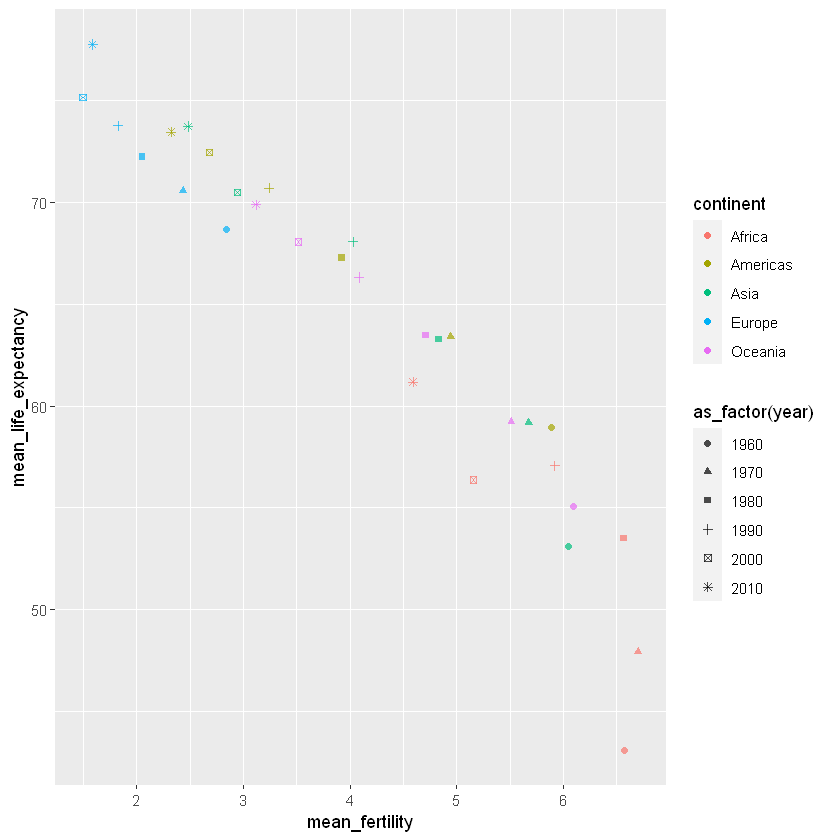

In [70]:
library(ggrepel)

years <- c("1960", "1970", "1980", "1990", "2000", "2010")

summarize_plot <- gapminder %>% 
  dplyr::filter(year %in% years) %>%
  group_by(continent, year) %>%
  summarise(mean_life_expectancy = mean(life_expectancy),
            mean_fertility = mean(fertility)) %>%
  ggplot(aes(x = mean_fertility,
             y = mean_life_expectancy)) +
  geom_point(aes(colour = continent, shape = as_factor(year)), alpha = 0.7) +    guides(colour = guide_legend(override.aes = list(alpha = 1)))

summarize_plot

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


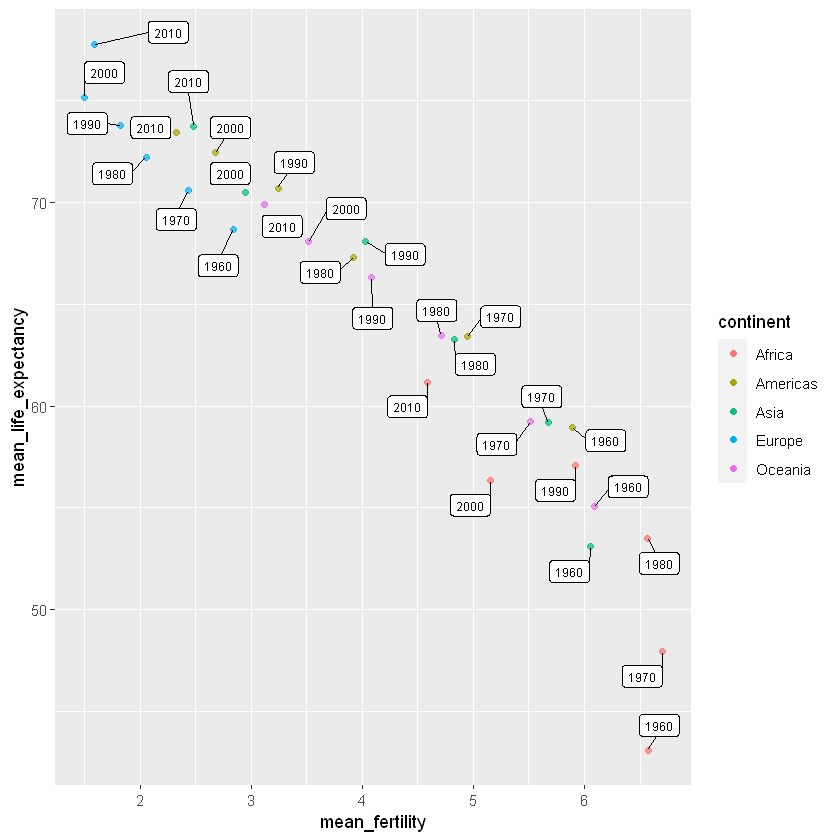

In [71]:
library(ggrepel)

years <- c("1960", "1970", "1980", "1990", "2000", "2010")

labels_plot <- gapminder %>% 
  dplyr::filter(year %in% years) %>%
  group_by(continent, year) %>%
  summarise(mean_life_expectancy = mean(life_expectancy),
            mean_fertility = mean(fertility)) %>%
  ggplot(aes(x = mean_fertility,
             y = mean_life_expectancy)) +
  geom_point(aes(colour = continent), alpha = 0.7) +
  geom_label_repel(aes(label=year), size = 2.5, box.padding = .5) +              guides(colour = guide_legend(override.aes = list(alpha = 1)))
  
labels_plot

# G. Displaying a model

In [72]:
## Model
lm <- gapminder %>% lm(formula = life_expectancy ~ fertility)

correlation <- cor.test(x = gapminder$fertility, y = gapminder$life_expectancy, method = "pearson")

# save predictions of the model in the new data frame 
# together with variable you want to plot against
predicted_df <- data.frame(gapminder_pred = predict(lm, gapminder), 
                           fertility = gapminder$fertility)

Warning message:
"Removed 187 rows containing missing values (geom_point)."
Warning message:
"Removed 187 row(s) containing missing values (geom_path)."


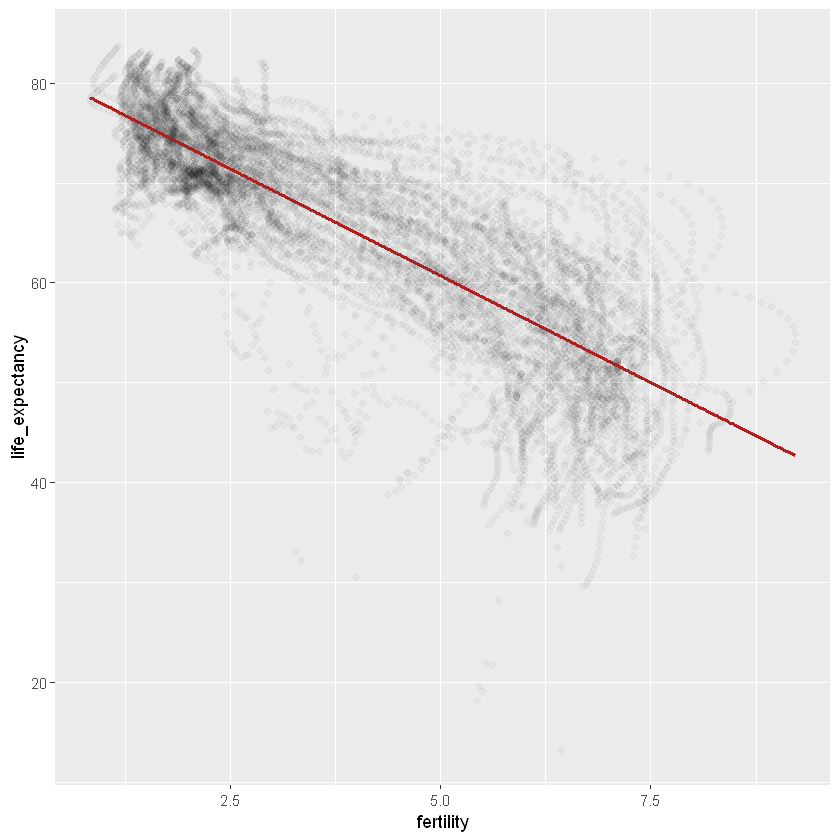

In [74]:
model_plot <- gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(alpha = 0.03) +
  geom_line(data = predicted_df, aes(x = fertility, 
                                     y = gapminder_pred),
            colour = "#af2121", size = 1)

model_plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 187 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 187 rows containing non-finite values (stat_cor)."
Warning message:
"Removed 187 rows containing missing values (geom_point)."


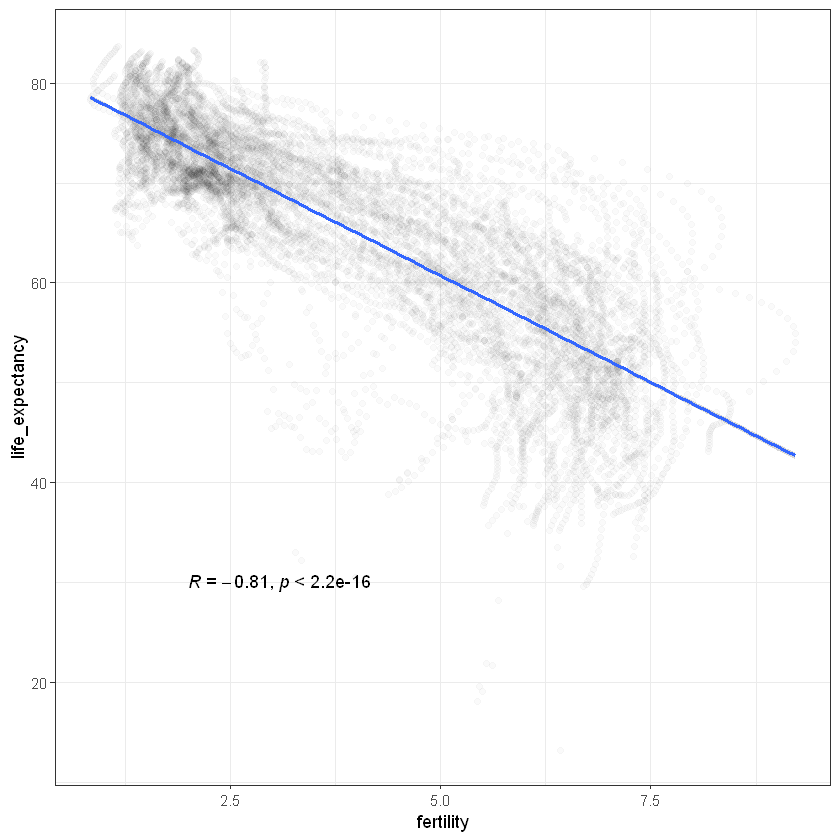

In [79]:
gapminder %>% 
  ggplot(aes(x = fertility,
             y = life_expectancy)) +
  geom_point(alpha = 0.02) +
  geom_smooth(method = "lm") +
  stat_cor(method = "pearson", label.x = 2, label.y = 30) +
  theme_bw()


# EXERCISE 5; recap - Discuss with your neighbour

Which tricks can we use to reduce the dimensionality of the plotted data (prevent overplotting)?

Try listing at least 6 methods:
1. calculating mean yearly child birth (life_expectency / ferility)
2. calculating welfare (life expectancy and income)
3. absolute childbirth (fertility and infant mortality)
4. bruto nationaal product
5. mean income per person per year



# EXERCISE 7; Discuss with your neighbour, and write the R code to:

Try plotting the infant_mortality against the filtered years for the same countries as the code above (Netherlands, India, China), recycling some of the code above. Discuss the resulting graph in the light of the life_expectancy graph, what do you think about the the developments in China?

Want to know more? see: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4331212/ Babxiarz, 2016


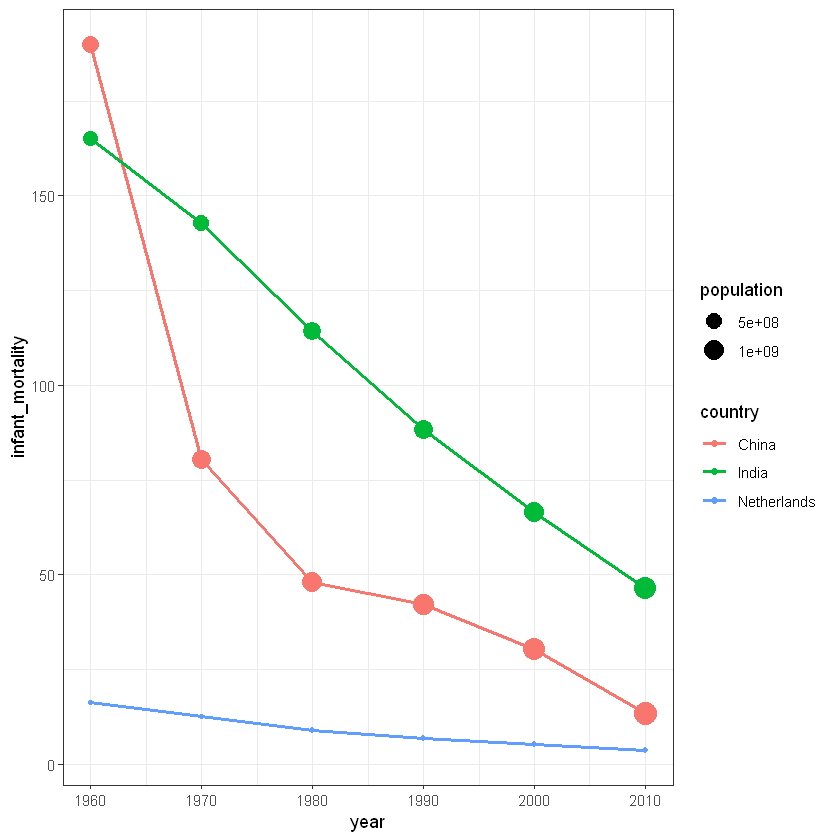

In [80]:
continuous <- gapminder %>%
  dplyr::filter(country == "Netherlands" | 
                country == "China" |
                country == "India") %>%
  dplyr::filter(year %in% years) %>%
  ggplot(aes(x = year,
         y = infant_mortality)) +
  geom_point(aes(size = population, colour = country)) +
  guides(colour = guide_legend(override.aes = list(alpha = 1))) +
  geom_line(aes(group = country, colour = country), size = 1) +
  theme_bw()
continuous